# импорт пакетов

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection

from sklearn import preprocessing
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import sklearn.metrics as mtrcs
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV


import seaborn as sns
from IPython.display import display
sns.set()
sns.set_context("talk")

%matplotlib inline

 # Импорт данных и названий переменных

In [ ]:
paramNames=[
    'АЭ: кол-во <Сумма> (шт.)',	'Время в перепитке <Сред.> (час)', 
    'Время в тесте <Сред.> (час)',  'Время в недопитке <Сред.> (час)', 
    'Выливка: Л/О <Сред.> (кг)', 'Выход на в.сутки по заданию <Сред.> (кг)',
    'Выход на в.сутки: Кр/весы <Сред.> (кг)', 'Выход по току: Кр/весы <Сред.> (%)',
    'Кол-во доз АПГ в недопитке <Сред.> (шт)', 'Кол-во доз АПГ в номинале <Сред.> (шт)',
    'Кол-во доз АПГ в перепитке <Сред.> (шт)', 'Кол-во доз АПГ в тесте <Сред.> (шт)',
    'Кол-во неэфф. перепиток <Сред.> (шт)', 'Напр. прив. <Сред.> (В)',
    'РМПР: длит. ВИРА <Сред.> (сек.)', 'РМПР: длит. МАЙНА <Сред.> (сек)',
    'РМПР: кол-во ВИРА <Сред.> (шт.)', 'РМПР: кол-во МАЙНА <Сред.> (шт.)',
    'РМПР: коэфф. <Сред.> ( )', 'Ток серии (КПП) <Сред.> (кА)',
    'Эл-лит: темп-ра <Сред.> (°C)', 'Управление: темп-ра ликв. <Сред.> (°C)',
    'Металл: уровень <Сред.> (см)',  'ФРП: H настыли ср. <Сред.> (оценка)',
    'ФРП: L настыли ср. <Сред.> (оценка)', 'AlF3: сумм. вес доз <Сред.> (кг)',
    'AlF3: уставка питания <Сред.> (мин)', 'Шум <Сред.> (В)',
    'Эл-лит: КО <Сред.> ( )', 'Посл. ур. эл-та <Сред.> (см)'
]
columnNames = [
    'AE', 'TIME1',
    'TIME2', 'TIME3',
    'POURING', 'OUT1',
    'OUT2', 'OUT3',
    'APG1', 'APG2',
    'APG3', 'APG4',
    'NE', 'U1',
    'RMPR1','RMPR2',
    'RMPR3','RMPR4',
    'RMPR5','I',
    'TEMP', 'TLIQ',
    'MET', 'FRP1',
    'FRP2', 'ALF1',
    'ALF2', 'NOISE',
    'KO', 'LEVEL'
]
columnsNumber=len(columnNames)

paramNamesDictionary = dict(zip(columnNames, paramNames))    

inputNames = columnNames.copy()
inputNames.remove('TEMP'), inputNames.remove('KO')
inputNumber=len(inputNames)
outputNames=['TEMP', 'KO']    
outputNumber=len(outputNames)

print('columns', columnsNumber)
print('inputs', inputNumber)
print('outputs', outputNumber)
print(paramNamesDictionary)

columns 30
inputs 28
outputs 2
{&#39;AE&#39;: &#39;АЭ: кол-во &lt;Сумма&gt; (шт.)&#39;, &#39;TIME1&#39;: &#39;Время в перепитке &lt;Сред.&gt; (час)&#39;, &#39;TIME2&#39;: &#39;Время в тесте &lt;Сред.&gt; (час)&#39;, &#39;TIME3&#39;: &#39;Время в недопитке &lt;Сред.&gt; (час)&#39;, &#39;POURING&#39;: &#39;Выливка: Л/О &lt;Сред.&gt; (кг)&#39;, &#39;OUT1&#39;: &#39;Выход на в.сутки по заданию &lt;Сред.&gt; (кг)&#39;, &#39;OUT2&#39;: &#39;Выход на в.сутки: Кр/весы &lt;Сред.&gt; (кг)&#39;, &#39;OUT3&#39;: &#39;Выход по току: Кр/весы &lt;Сред.&gt; (%)&#39;, &#39;APG1&#39;: &#39;Кол-во доз АПГ в недопитке &lt;Сред.&gt; (шт)&#39;, &#39;APG2&#39;: &#39;Кол-во доз АПГ в номинале &lt;Сред.&gt; (шт)&#39;, &#39;APG3&#39;: &#39;Кол-во доз АПГ в перепитке &lt;Сред.&gt; (шт)&#39;, &#39;APG4&#39;: &#39;Кол-во доз АПГ в тесте &lt;Сред.&gt; (шт)&#39;, &#39;NE&#39;: &#39;Кол-во неэфф. перепиток &lt;Сред.&gt; (шт)&#39;, &#39;U1&#39;: &#39;Напр. прив. &lt;Сред.&gt; (В)&#39;, &#39;RMPR1&#39;: &#39;РМПР: длит

# Load data

In [ ]:

raw = pd.read_excel('item 4.xls',\
    skiprows=5, usecols=range(1,1+30), header=None)
raw.columns=columnNames

test = pd.read_excel('test 4.xls',\
    skiprows=5, usecols=range(1,1+30), header=None)
test.columns=columnNames

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


# нормализация данных

In [ ]:
# normalize [0,1]
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(raw)
dataScaled = pd.DataFrame(x_scaled)
dataScaled.columns=columnNames
dataScaled.head()


AE     TIME1     TIME2     TIME3   POURING      OUT1      OUT2      OUT3  \
0  0.0  0.192308  0.000000  0.038462  0.646302  0.804688  0.804688  0.804422   
1  0.0  0.320513  0.133333  0.576923  0.630225  0.804688  0.804688  0.804422   
2  0.0  0.269231  0.100000  0.423077  0.678457  0.804688  0.804688  0.804422   
3  0.0  0.282051  0.166667  0.256410  0.604502  0.804688  0.804688  0.804422   
4  0.0  0.692308  0.000000  0.512821  0.633441  0.804688  0.804688  0.804422   

       APG1      APG2  ...      TEMP      TLIQ       MET  FRP1  FRP2  \
0  0.102791  0.778449  ...  0.413043  0.639344  0.666667   NaN   NaN   
1  0.584752  0.509819  ...  0.260870  0.524590  0.666667   NaN   NaN   
2  0.437032  0.592649  ...  0.543478  0.426230  0.666667   NaN   NaN   
3  0.263445  0.687815  ...  0.413043  0.442623  0.777778   NaN   NaN   
4  0.569775  0.206949  ...  0.217391  0.491803  0.888889   NaN   NaN   

       ALF1      ALF2     NOISE        KO  LEVEL  
0  0.775510  0.004237  0.292683       NaN    NaN  
1  0.421769  0.400424  0.414634  0.528302    NaN  
2  0.258503  0.648305  0.390244       NaN    NaN  
3  0.408163  0.023305  0.439024       NaN    NaN  
4  0.312925  0.368644  0.146341       NaN    NaN  

[5 rows x 30 columns]

In [ ]:
scaler2 = preprocessing.MinMaxScaler()
x_scaled2 = scaler.fit_transform(test)
testScaled = pd.DataFrame(x_scaled2)
testScaled.columns=columnNames
testScaled.head()

AE     TIME1     TIME2     TIME3  POURING  OUT1  OUT2      OUT3      APG1  \
0  0.0  0.704918  0.000000  0.241935    0.960   0.9   0.9  0.868561  0.318440   
1  0.0  1.000000  0.000000  0.096774    0.852   0.9   0.9  0.868561  0.159220   
2  0.0  0.491803  0.136364  0.419355    0.916   0.9   0.9  0.868561  0.498781   
3  0.0  0.606557  0.045455  0.709677    0.208   0.2   0.2  0.181172  0.730301   
4  0.0  0.360656  0.500000  0.709677    0.884   0.9   0.9  0.868561  0.751422   

       APG2  ...   TEMP      TLIQ       MET  FRP1  FRP2      ALF1      ALF2  \
0  0.578373  ...  0.450  0.581395  0.333333   NaN   NaN  0.446154  0.358811   
1  0.477096  ...  0.475  0.581395  0.333333   NaN   NaN  0.276923  0.101911   
2  0.501091  ...  1.000  0.906977  0.555556   NaN   NaN  0.376923  0.031847   
3  0.288563  ...  0.325  0.651163  0.333333   NaN   NaN  0.553846  0.016985   
4  0.235587  ...  0.700  0.930233  0.555556   NaN   NaN  0.669231  0.008493   

      NOISE        KO     LEVEL  
0  0.310345  0.424242  0.500000  
1  0.310345       NaN  1.000000  
2  0.137931       NaN  0.416667  
3  0.172414       NaN  0.500000  
4  0.034483  0.878788  0.666667  

[5 rows x 30 columns]

# Используем линейную интерполяцию для построения моделей

In [ ]:
# lets use liniear interpolation for scalled data
for col in dataScaled.columns:
    if np.isnan(dataScaled.loc[0, col]):
        dataScaled.loc[0, col] = dataScaled[col].mean()
data=dataScaled.interpolate(method='linear').copy()
data.head()


AE     TIME1     TIME2     TIME3   POURING      OUT1      OUT2      OUT3  \
0  0.0  0.192308  0.000000  0.038462  0.646302  0.804688  0.804688  0.804422   
1  0.0  0.320513  0.133333  0.576923  0.630225  0.804688  0.804688  0.804422   
2  0.0  0.269231  0.100000  0.423077  0.678457  0.804688  0.804688  0.804422   
3  0.0  0.282051  0.166667  0.256410  0.604502  0.804688  0.804688  0.804422   
4  0.0  0.692308  0.000000  0.512821  0.633441  0.804688  0.804688  0.804422   

       APG1      APG2  ...      TEMP      TLIQ       MET      FRP1  FRP2  \
0  0.102791  0.778449  ...  0.413043  0.639344  0.666667  0.850000   0.0   
1  0.584752  0.509819  ...  0.260870  0.524590  0.666667  0.855556   0.0   
2  0.437032  0.592649  ...  0.543478  0.426230  0.666667  0.861111   0.0   
3  0.263445  0.687815  ...  0.413043  0.442623  0.777778  0.866667   0.0   
4  0.569775  0.206949  ...  0.217391  0.491803  0.888889  0.872222   0.0   

       ALF1      ALF2     NOISE        KO     LEVEL  
0  0.775510  0.004237  0.292683  0.588187  0.468614  
1  0.421769  0.400424  0.414634  0.528302  0.471109  
2  0.258503  0.648305  0.390244  0.514151  0.473604  
3  0.408163  0.023305  0.439024  0.500000  0.476098  
4  0.312925  0.368644  0.146341  0.485849  0.478593  

[5 rows x 30 columns]

In [ ]:
# lets use liniear interpolation for scalled data
for col in testScaled.columns:
    if np.isnan(testScaled.loc[0, col]):
        testScaled.loc[0, col] = testScaled[col].mean()
testData=testScaled.interpolate(method='linear').copy()
testData.head()


AE     TIME1     TIME2     TIME3  POURING  OUT1  OUT2      OUT3      APG1  \
0  0.0  0.704918  0.000000  0.241935    0.960   0.9   0.9  0.868561  0.318440   
1  0.0  1.000000  0.000000  0.096774    0.852   0.9   0.9  0.868561  0.159220   
2  0.0  0.491803  0.136364  0.419355    0.916   0.9   0.9  0.868561  0.498781   
3  0.0  0.606557  0.045455  0.709677    0.208   0.2   0.2  0.181172  0.730301   
4  0.0  0.360656  0.500000  0.709677    0.884   0.9   0.9  0.868561  0.751422   

       APG2  ...   TEMP      TLIQ       MET  FRP1  FRP2      ALF1      ALF2  \
0  0.578373  ...  0.450  0.581395  0.333333   0.0   0.0  0.446154  0.358811   
1  0.477096  ...  0.475  0.581395  0.333333   0.0   0.0  0.276923  0.101911   
2  0.501091  ...  1.000  0.906977  0.555556   0.0   0.0  0.376923  0.031847   
3  0.288563  ...  0.325  0.651163  0.333333   0.0   0.0  0.553846  0.016985   
4  0.235587  ...  0.700  0.930233  0.555556   0.0   0.0  0.669231  0.008493   

      NOISE        KO     LEVEL  
0  0.310345  0.424242  0.500000  
1  0.310345  0.537879  1.000000  
2  0.137931  0.651515  0.416667  
3  0.172414  0.765152  0.500000  
4  0.034483  0.878788  0.666667  

[5 rows x 30 columns]

# NN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.regularizers import l2

Using TensorFlow backend.


In [ ]:
dataInputs=data.drop(columns=['TEMP','KO']).copy()
dataTargets=data[['TEMP','KO']].copy()

In [ ]:
testInputs=testData.drop(columns=['TEMP','KO']).copy()
testTargets=testData[['TEMP','KO']].copy()

## Temp

In [ ]:
model = Sequential()
model.add(Dense(40, input_shape=(inputNumber,), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(20, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: &quot;sequential_6&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 40)                1160      
_________________________________________________________________
dense_17 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 21        
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam',
        metrics=['mean_squared_error', 'mean_absolute_error', ])
        
nnModel=model.fit(
    dataInputs.values, dataTargets['TEMP'], 
    epochs=1000,
    verbose=1)

Epoch 1/1000
365/365 [==============================] - 0s 712us/step - loss: 0.5726 - mean_squared_error: 0.0351 - mean_absolute_error: 0.1563
Epoch 2/1000
365/365 [==============================] - 0s 30us/step - loss: 0.5106 - mean_squared_error: 0.0321 - mean_absolute_error: 0.1496
Epoch 3/1000
365/365 [==============================] - 0s 33us/step - loss: 0.4546 - mean_squared_error: 0.0300 - mean_absolute_error: 0.1444
Epoch 4/1000
365/365 [==============================] - 0s 38us/step - loss: 0.4049 - mean_squared_error: 0.0287 - mean_absolute_error: 0.1415
Epoch 5/1000
365/365 [==============================] - 0s 33us/step - loss: 0.3603 - mean_squared_error: 0.0274 - mean_absolute_error: 0.1379
Epoch 6/1000
365/365 [==============================] - 0s 30us/step - loss: 0.3207 - mean_squared_error: 0.0266 - mean_absolute_error: 0.1358
Epoch 7/1000
365/365 [==============================] - 0s 30us/step - loss: 0.2857 - mean_squared_error: 0.0261 - mean_absolute_error: 0.134

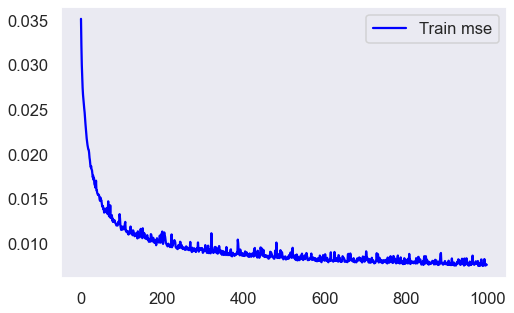

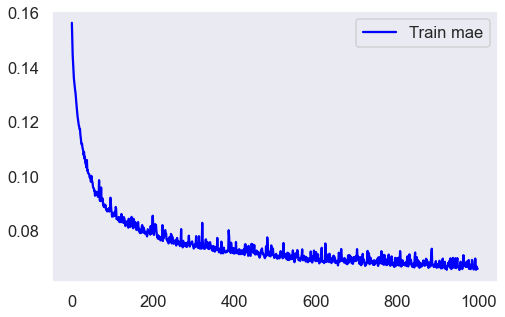

In [ ]:
# из отчета можно построить графики изменения мер качества
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(nnModel.history['mean_squared_error'], color='blue', label='Train mse')
ax.legend()
plt.grid()
plt.show()

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(nnModel.history['mean_absolute_error'], color='blue', label='Train mae')
ax.legend()
plt.grid()
plt.show()

In [ ]:
pred = model.predict(dataInputs)
print( 'mse=', mtrcs.mean_squared_error(dataTargets['TEMP'], pred, squared=False) )
print( 'r2=', mtrcs.r2_score(dataTargets['TEMP'], pred) )
print( 'mae=', mtrcs.mean_absolute_error(dataTargets['TEMP'], pred) )

mse= 0.08626417819087023
r2= 0.7943681329612048
mae= 0.06539782545195928


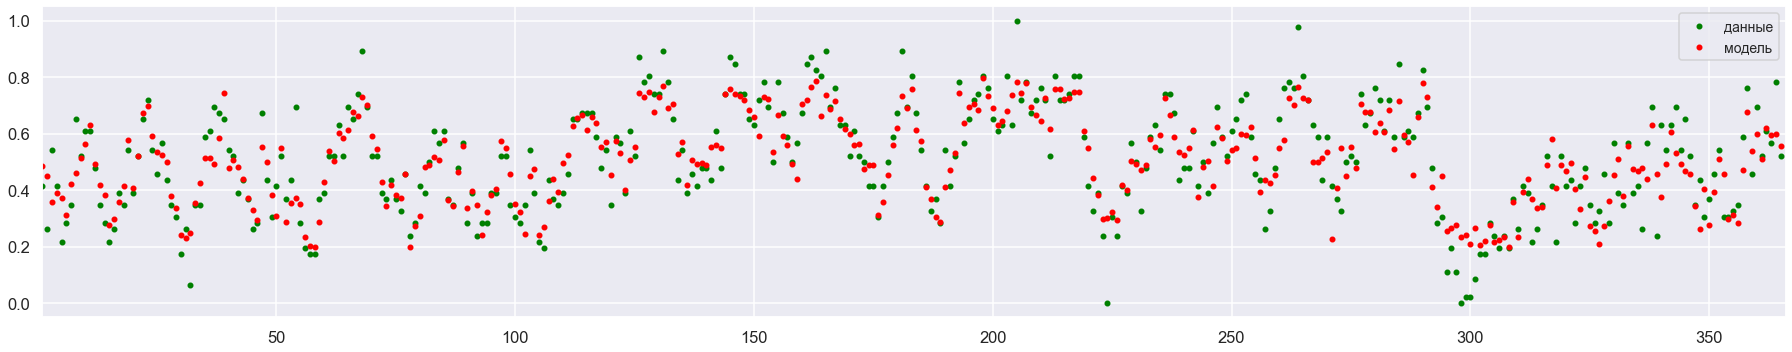

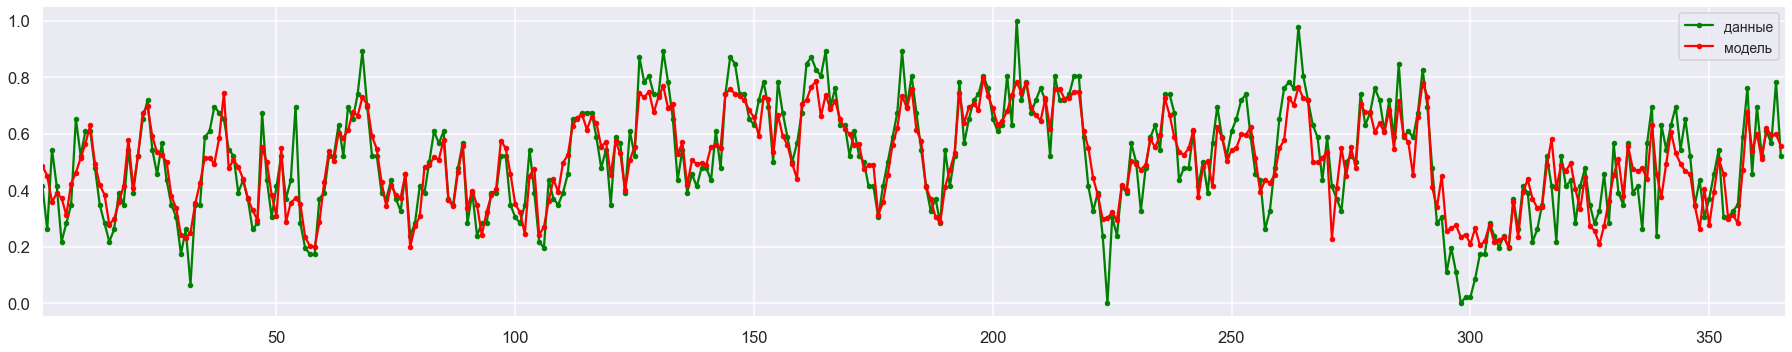

In [ ]:
xAxis=np.arange(1,len(pred)+1)
fig, ax = plt.subplots(figsize=(25,5))
ax.scatter(xAxis,dataTargets['TEMP'], color='green', marker='.', label='данные')
ax.scatter(xAxis,pred, color='red', marker='.', label='модель')
ax.set_xlim(1,len(pred)+1)
ax.legend(fontsize=14)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(25,5))
ax.plot(xAxis,dataTargets['TEMP'], color='green', marker='.', label='данные')
ax.plot(xAxis,pred, color='red', marker='.', label='модель')
ax.set_xlim(1,len(pred)+1)
ax.legend(fontsize=14)
plt.tight_layout()
plt.show()  

In [ ]:
pred = model.predict(testInputs)
print( 'mse=', mtrcs.mean_squared_error(testTargets['TEMP'], pred, squared=False) )
print( 'r2=', mtrcs.r2_score(testTargets['TEMP'], pred) )
print( 'mae=', mtrcs.mean_absolute_error(testTargets['TEMP'], pred) )

mse= 0.11646565420309951
r2= 0.5900335334222453
mae= 0.09398294718813653


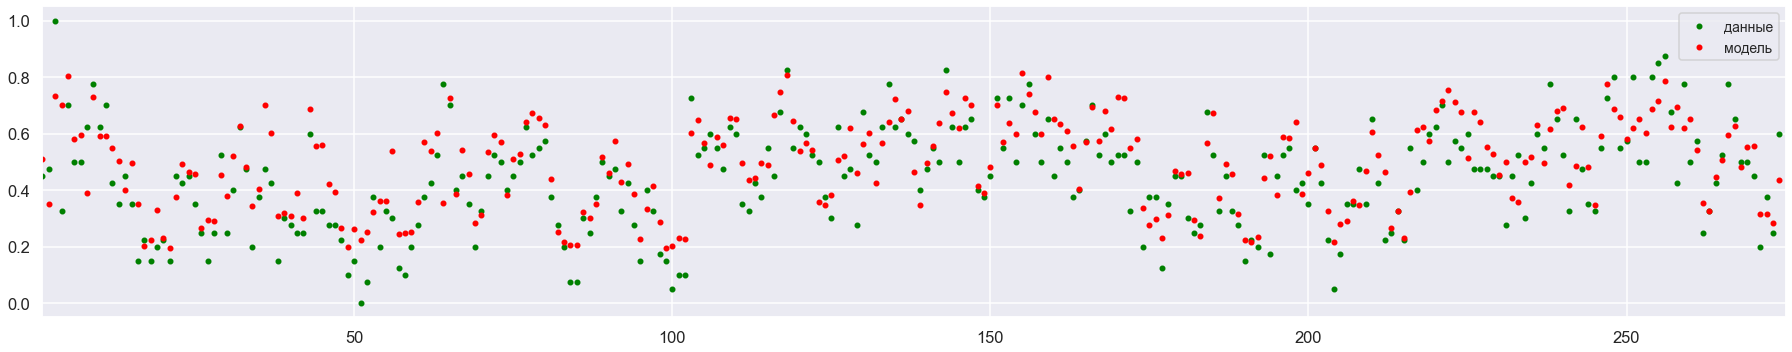

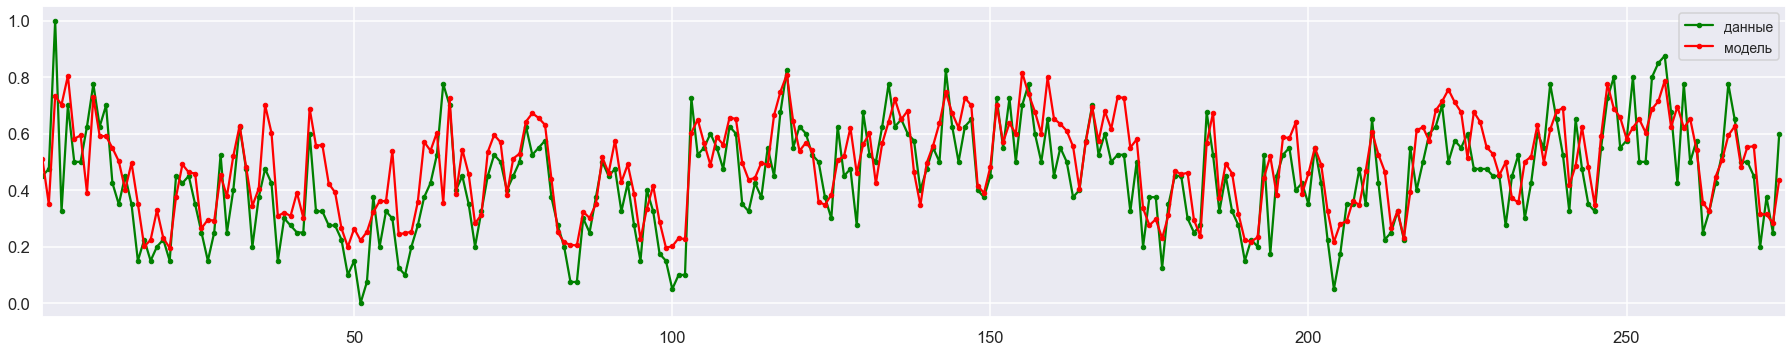

In [ ]:
xAxis=np.arange(1,len(pred)+1)
fig, ax = plt.subplots(figsize=(25,5))
ax.scatter(xAxis,testTargets['TEMP'], color='green', marker='.', label='данные')
ax.scatter(xAxis,pred, color='red', marker='.', label='модель')
ax.set_xlim(1,len(pred)+1)
ax.legend(fontsize=14)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(25,5))
ax.plot(xAxis,testTargets['TEMP'], color='green', marker='.', label='данные')
ax.plot(xAxis,pred, color='red', marker='.', label='модель')
ax.set_xlim(1,len(pred)+1)
ax.legend(fontsize=14)
plt.tight_layout()
plt.show()  

# more deep NN

In [ ]:
model2 = Sequential()
model2.add(Dense(100, input_shape=(inputNumber,), activation='relu', init='he_normal', kernel_regularizer=l2(0.01)))
model2.add(Dense(100, activation='relu', init='he_normal', kernel_regularizer=l2(0.01)))
model2.add(Dense(1, activation='sigmoid', init='he_normal'))
model2.summary()

Model: &quot;sequential_8&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 100)               2900      
_________________________________________________________________
dense_23 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 101       
Total params: 13,101
Trainable params: 13,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss='mean_squared_error', optimizer='adam',
        metrics=['mean_squared_error', 'mean_absolute_error', ])
        
nnModel2=model2.fit(
    dataInputs, dataTargets['TEMP'], 
    epochs=1000,
    verbose=1)

Epoch 1/1000
365/365 [==============================] - 0s 816us/step - loss: 3.8041 - mean_squared_error: 0.0300 - mean_absolute_error: 0.1403
Epoch 2/1000
365/365 [==============================] - 0s 57us/step - loss: 3.4254 - mean_squared_error: 0.0218 - mean_absolute_error: 0.1200
Epoch 3/1000
365/365 [==============================] - 0s 60us/step - loss: 3.0849 - mean_squared_error: 0.0193 - mean_absolute_error: 0.1128
Epoch 4/1000
365/365 [==============================] - 0s 71us/step - loss: 2.7781 - mean_squared_error: 0.0174 - mean_absolute_error: 0.1064
Epoch 5/1000
365/365 [==============================] - 0s 63us/step - loss: 2.5046 - mean_squared_error: 0.0175 - mean_absolute_error: 0.1067
Epoch 6/1000
365/365 [==============================] - 0s 60us/step - loss: 2.2607 - mean_squared_error: 0.0182 - mean_absolute_error: 0.1080
Epoch 7/1000
365/365 [==============================] - 0s 63us/step - loss: 2.0403 - mean_squared_error: 0.0161 - mean_absolute_error: 0.102

In [ ]:
pred2 = model2.predict(dataInputs)
print( 'mse=', mtrcs.mean_squared_error(dataTargets['TEMP'], pred2, squared=False) )
print( 'r2=', mtrcs.r2_score(dataTargets['TEMP'], pred2) )
print( 'mae=', mtrcs.mean_absolute_error(dataTargets['TEMP'], pred2) )

mse= 0.08438531697825744
r2= 0.8032280396679701
mae= 0.06412418641598157


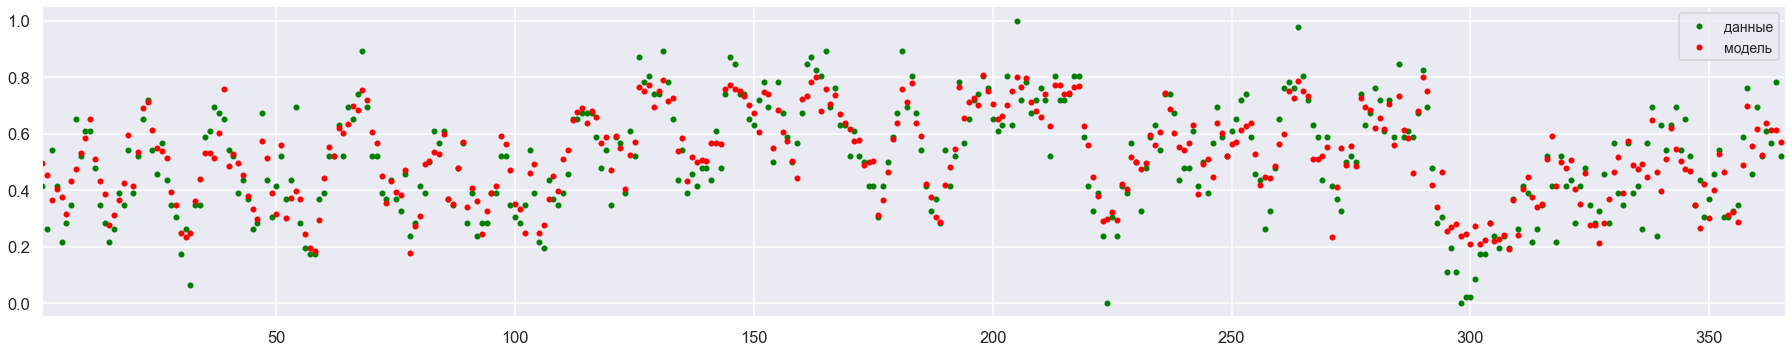

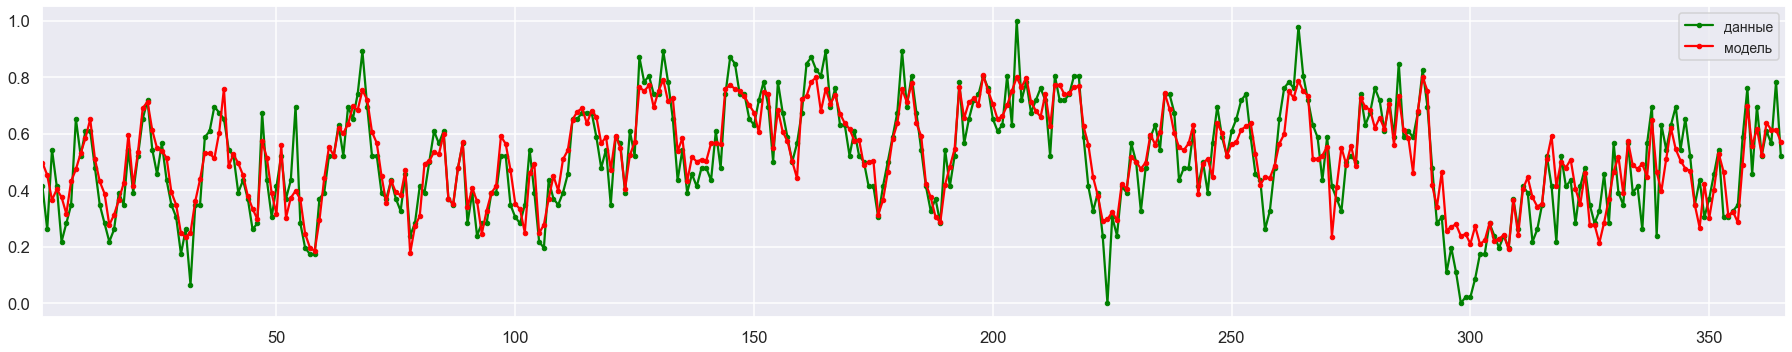

In [ ]:
xAxis=np.arange(1,len(pred2)+1)
fig, ax = plt.subplots(figsize=(25,5))
ax.scatter(xAxis,dataTargets['TEMP'], color='green', marker='.', label='данные')
ax.scatter(xAxis,pred2, color='red', marker='.', label='модель')
ax.set_xlim(1,len(pred2)+1)
ax.legend(fontsize=14)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(25,5))
ax.plot(xAxis,dataTargets['TEMP'], color='green', marker='.', label='данные')
ax.plot(xAxis,pred2, color='red', marker='.', label='модель')
ax.set_xlim(1,len(pred2)+1)
ax.legend(fontsize=14)
plt.tight_layout()
plt.show()   

In [ ]:
pred2 = model2.predict(testInputs)
print( 'mse=', mtrcs.mean_squared_error(testTargets['TEMP'], pred2, squared=False) )
print( 'r2=', mtrcs.r2_score(testTargets['TEMP'], pred2) )
print( 'mae=', mtrcs.mean_absolute_error(testTargets['TEMP'], pred2) )

mse= 0.11740612003648633
r2= 0.5833858025870504
mae= 0.09514437942174157


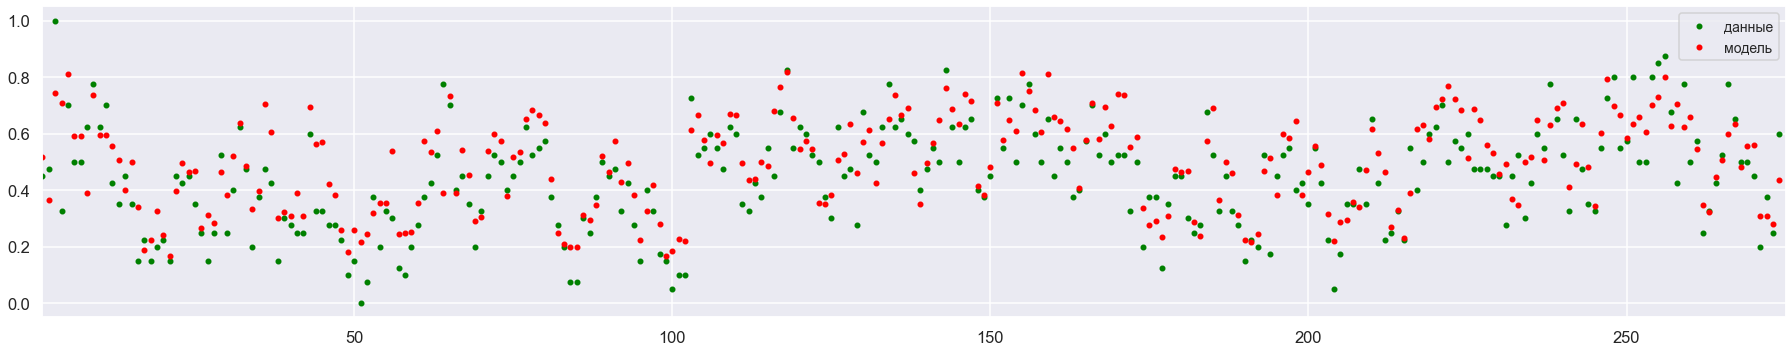

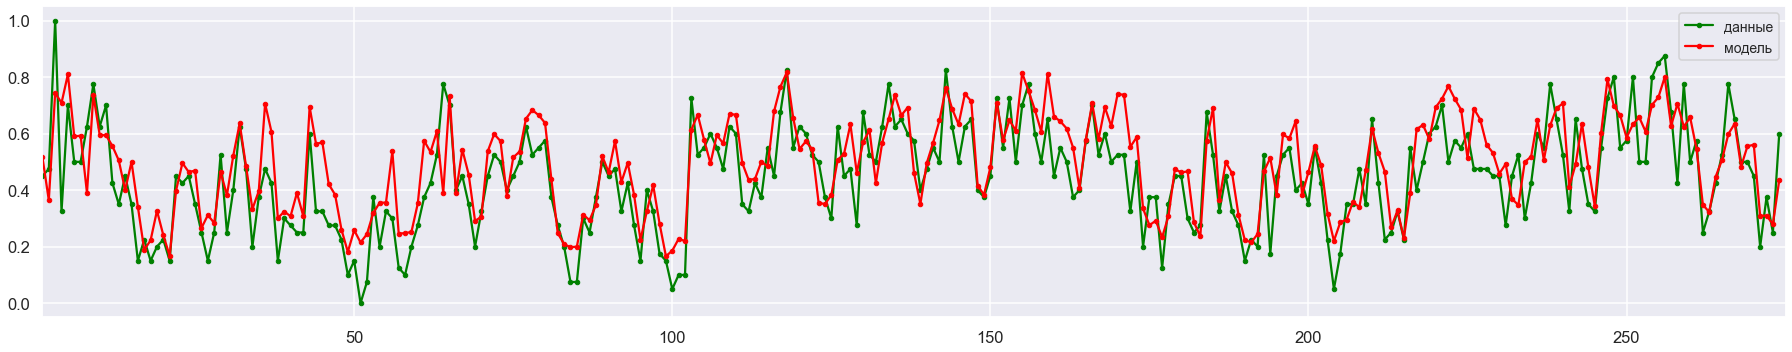

In [ ]:
xAxis=np.arange(1,len(pred2)+1)
fig, ax = plt.subplots(figsize=(25,5))
ax.scatter(xAxis,testTargets['TEMP'], color='green', marker='.', label='данные')
ax.scatter(xAxis,pred2, color='red', marker='.', label='модель')
ax.set_xlim(1,len(pred2)+1)
ax.legend(fontsize=14)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(25,5))
ax.plot(xAxis,testTargets['TEMP'], color='green', marker='.', label='данные')
ax.plot(xAxis,pred2, color='red', marker='.', label='модель')
ax.set_xlim(1,len(pred2)+1)
ax.legend(fontsize=14)
plt.tight_layout()
plt.show()   

## KO

In [ ]:
model = Sequential()
model.add(Dense(40, input_shape=(inputNumber,), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(20, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='mean_squared_error', optimizer='adam',
        metrics=['mean_squared_error', 'mean_absolute_error', ])

nnModel=model.fit(
    dataInputs.values, dataTargets['KO'], 
    epochs=1000,
    verbose=1)

Model: &quot;sequential_1&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                1160      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
365/365 [==============================] - 0s 846us/step - loss: 0.6067 - mean_squared_error: 0.0352 - mean_absolute_error: 0.1571
Epoch 2/1000
365/365 [==============================] - 0s 30us/step - loss: 0.5424 - mean_squared_error: 0.0313 - mean_absolute_error: 0.1473
Epoch 3/1000
365/365 [==============================] - 0s 33us/step - loss: 0.4856 -

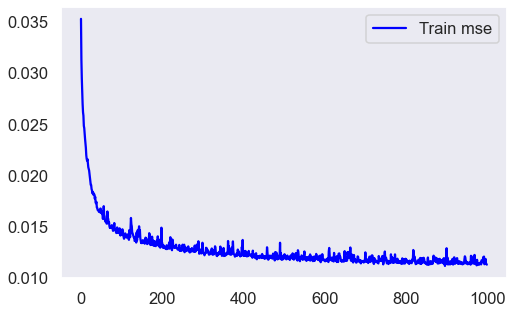

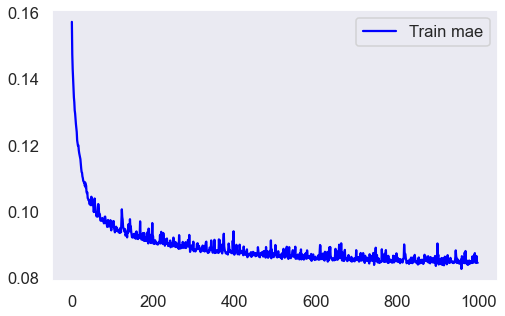

In [ ]:
# из отчета можно построить графики изменения мер качества
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(nnModel.history['mean_squared_error'], color='blue', label='Train mse')
ax.legend()
plt.grid()
plt.show()

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(nnModel.history['mean_absolute_error'], color='blue', label='Train mae')
ax.legend()
plt.grid()
plt.show()

In [ ]:
pred = model.predict(dataInputs)
print( 'mse=', mtrcs.mean_squared_error(dataTargets['KO'], pred, squared=False) )
print( 'r2=', mtrcs.r2_score(dataTargets['KO'], pred) )
print( 'mae=', mtrcs.mean_absolute_error(dataTargets['KO'], pred) )

mse= 0.10622469875284529
r2= 0.6963773644947462
mae= 0.08390043189404318


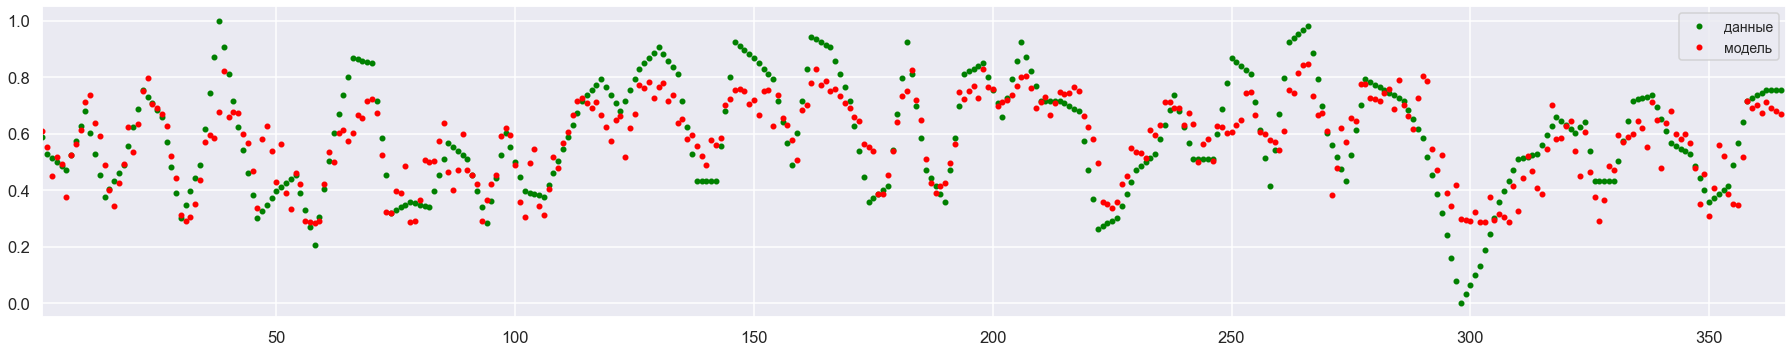

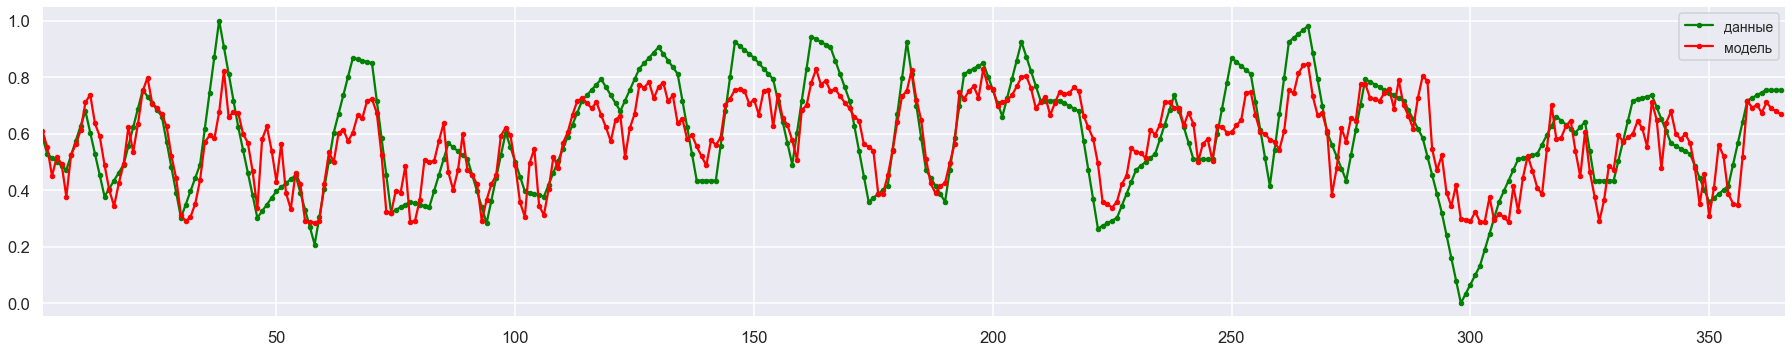

In [ ]:
xAxis=np.arange(1,len(pred)+1)
fig, ax = plt.subplots(figsize=(25,5))
ax.scatter(xAxis,dataTargets['KO'], color='green', marker='.', label='данные')
ax.scatter(xAxis,pred, color='red', marker='.', label='модель')
ax.set_xlim(1,len(pred)+1)
ax.legend(fontsize=14)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(25,5))
ax.plot(xAxis,dataTargets['KO'], color='green', marker='.', label='данные')
ax.plot(xAxis,pred, color='red', marker='.', label='модель')
ax.set_xlim(1,len(pred)+1)
ax.legend(fontsize=14)
plt.tight_layout()
plt.show() 

In [ ]:
pred = model.predict(testInputs)
print( 'mse=', mtrcs.mean_squared_error(testTargets['KO'], pred, squared=False) )
print( 'r2=', mtrcs.r2_score(testTargets['KO'], pred) )
print( 'mae=', mtrcs.mean_absolute_error(testTargets['KO'], pred) )

mse= 0.1405309652185636
r2= 0.38715874781333826
mae= 0.1132862776570607


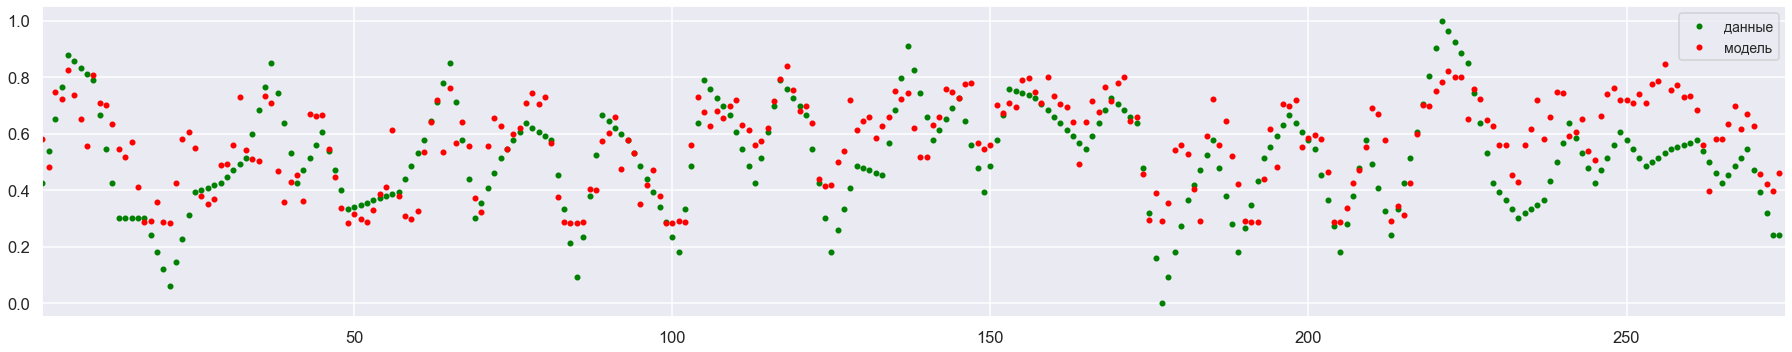

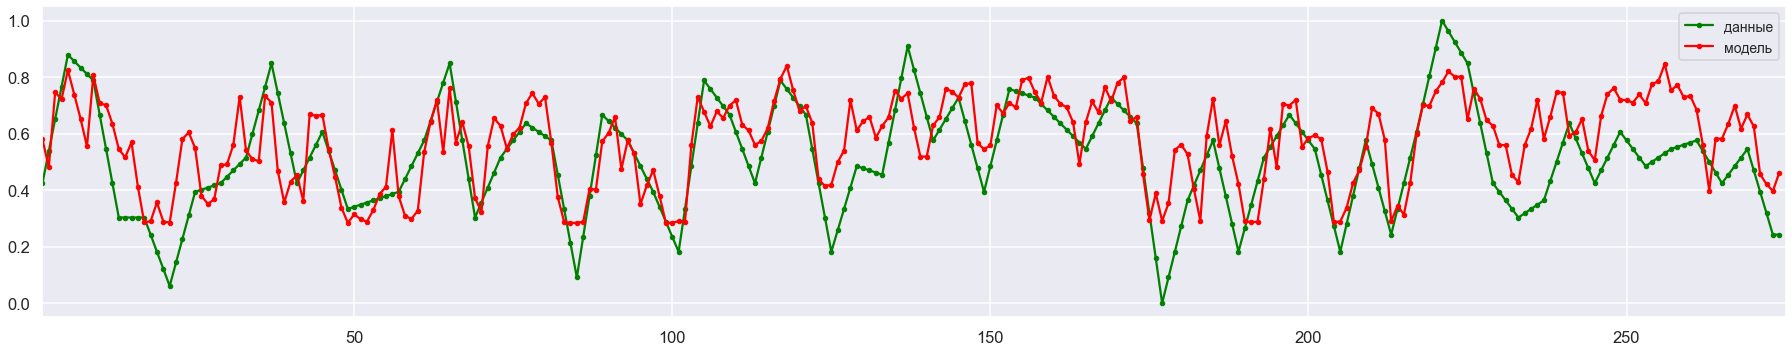

In [ ]:
xAxis=np.arange(1,len(pred)+1)
fig, ax = plt.subplots(figsize=(25,5))
ax.scatter(xAxis,testTargets['KO'], color='green', marker='.', label='данные')
ax.scatter(xAxis,pred, color='red', marker='.', label='модель')
ax.set_xlim(1,len(pred)+1)
ax.legend(fontsize=14)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(25,5))
ax.plot(xAxis,testTargets['KO'], color='green', marker='.', label='данные')
ax.plot(xAxis,pred, color='red', marker='.', label='модель')
ax.set_xlim(1,len(pred)+1)
ax.legend(fontsize=14)
plt.tight_layout()
plt.show() 

# Deeper

In [ ]:
model = Sequential()
model.add(Dense(100, input_shape=(inputNumber,), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(100, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='mean_squared_error', optimizer='adam',
        metrics=['mean_squared_error', 'mean_absolute_error', ])

nnModel=model.fit(
    dataInputs.values, dataTargets['KO'], 
    epochs=1000,
    verbose=1)

Model: &quot;sequential_2&quot;
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               2900      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 13,101
Trainable params: 13,101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
365/365 [==============================] - 0s 808us/step - loss: 1.3809 - mean_squared_error: 0.0365 - mean_absolute_error: 0.1557
Epoch 2/1000
365/365 [==============================] - 0s 55us/step - loss: 1.1467 - mean_squared_error: 0.0296 - mean_absolute_error: 0.1415
Epoch 3/1000
365/365 [==============================] - 0s 60us/step - loss: 0.9428

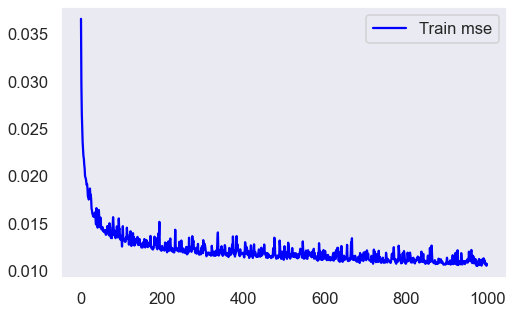

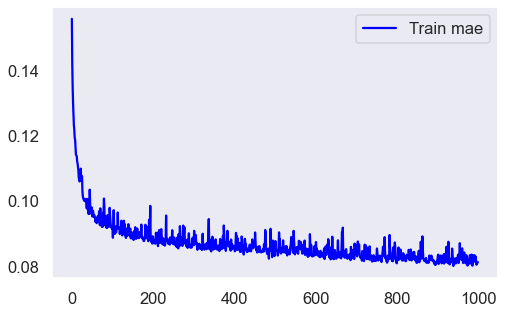

In [ ]:
# из отчета можно построить графики изменения мер качества
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(nnModel.history['mean_squared_error'], color='blue', label='Train mse')
ax.legend()
plt.grid()
plt.show()

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(nnModel.history['mean_absolute_error'], color='blue', label='Train mae')
ax.legend()
plt.grid()
plt.show()

In [ ]:
pred = model.predict(dataInputs)
print( 'mse=', mtrcs.mean_squared_error(dataTargets['KO'], pred, squared=False) )
print( 'r2=', mtrcs.r2_score(dataTargets['KO'], pred) )
print( 'mae=', mtrcs.mean_absolute_error(dataTargets['KO'], pred) )


mse= 0.10277983902830369
r2= 0.7157509670854898
mae= 0.08052276443099246


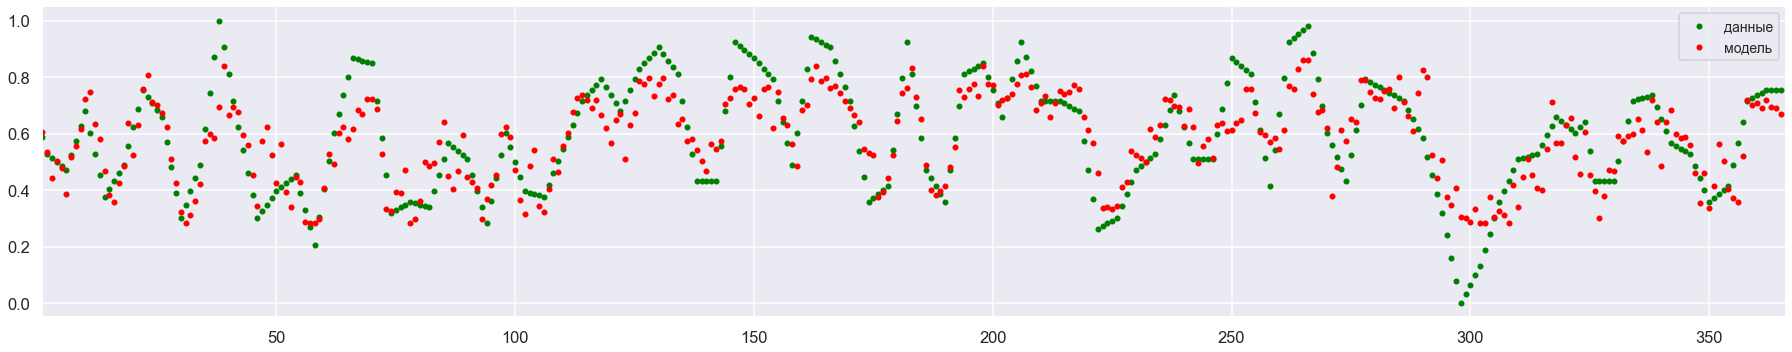

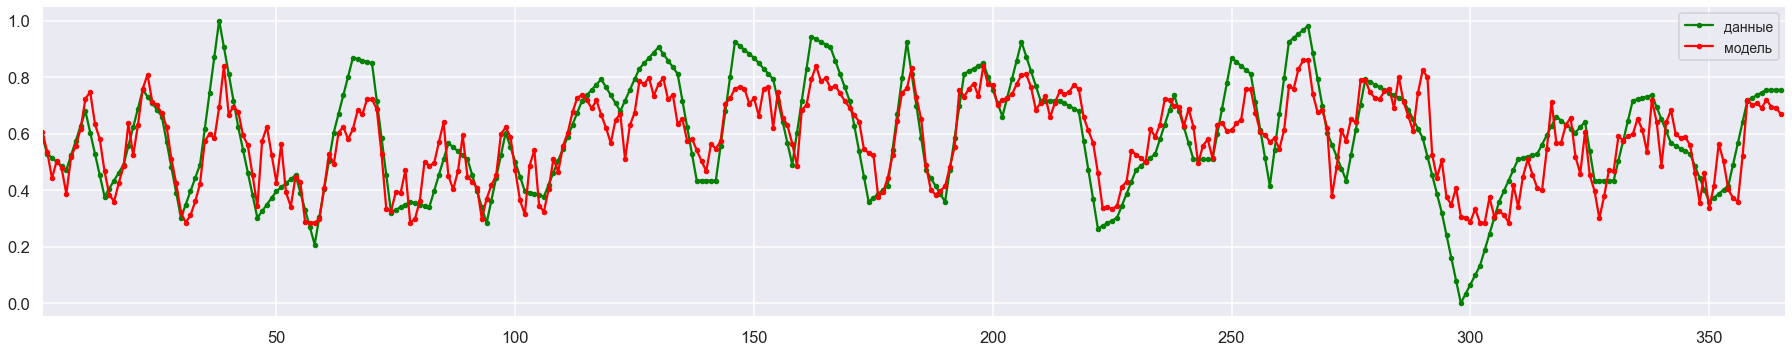

In [ ]:
xAxis=np.arange(1,len(pred)+1)
fig, ax = plt.subplots(figsize=(25,5))
ax.scatter(xAxis,dataTargets['KO'], color='green', marker='.', label='данные')
ax.scatter(xAxis,pred, color='red', marker='.', label='модель')
ax.set_xlim(1,len(pred)+1)
ax.legend(fontsize=14)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(25,5))
ax.plot(xAxis,dataTargets['KO'], color='green', marker='.', label='данные')
ax.plot(xAxis,pred, color='red', marker='.', label='модель')
ax.set_xlim(1,len(pred)+1)
ax.legend(fontsize=14)
plt.tight_layout()
plt.show()  

In [ ]:
pred = model.predict(testInputs)
print( 'mse=', mtrcs.mean_squared_error(testTargets['KO'], pred, squared=False) )
print( 'r2=', mtrcs.r2_score(testTargets['KO'], pred) )
print( 'mae=', mtrcs.mean_absolute_error(testTargets['KO'], pred) )

mse= 0.14103426221472212
r2= 0.3827612332044654
mae= 0.11387141899273134


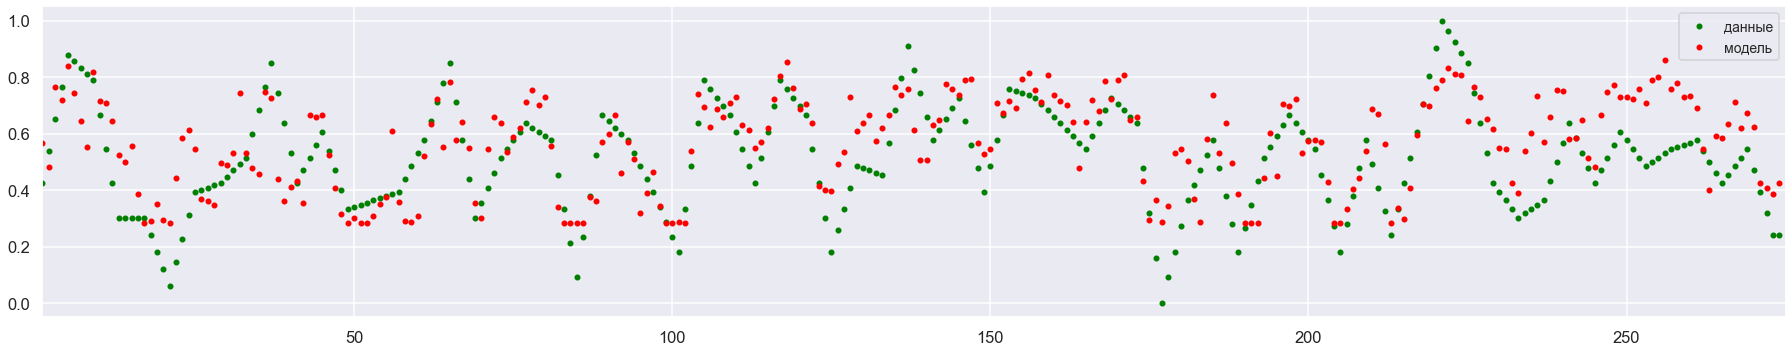

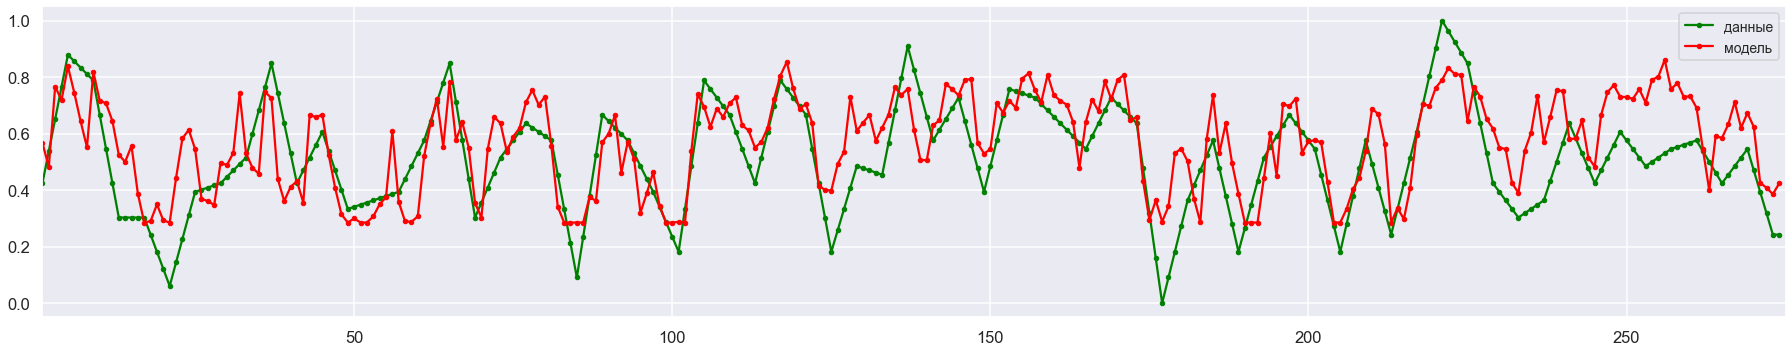

In [ ]:
xAxis=np.arange(1,len(pred)+1)
fig, ax = plt.subplots(figsize=(25,5))
ax.scatter(xAxis,testTargets['KO'], color='green', marker='.', label='данные')
ax.scatter(xAxis,pred, color='red', marker='.', label='модель')
ax.set_xlim(1,len(pred)+1)
ax.legend(fontsize=14)
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(25,5))
ax.plot(xAxis,testTargets['KO'], color='green', marker='.', label='данные')
ax.plot(xAxis,pred, color='red', marker='.', label='модель')
ax.set_xlim(1,len(pred)+1)
ax.legend(fontsize=14)
plt.tight_layout()
plt.show()  